In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import nibabel as nib

In [33]:
! ls brats_data_raw/Brats17TrainingData/HGG/Brats17_TCIA_211_1

Brats17_TCIA_211_1_flair.nii.gz  Brats17_TCIA_211_1_t1.nii.gz
Brats17_TCIA_211_1_seg.nii.gz	 Brats17_TCIA_211_1_t2.nii.gz
Brats17_TCIA_211_1_t1ce.nii.gz


In [36]:
patient_path = 'brats_data_raw/Brats17TrainingData/HGG/Brats17_TCIA_211_1/Brats17_TCIA_211_1'

In [43]:
patient_t1 = nib.load(patient_path + '_t1.nii.gz').get_data()
patient_t1c = nib.load(patient_path + '_t1ce.nii.gz').get_data()
patient_t2 = nib.load(patient_path + '_t2.nii.gz').get_data()
patient_flair = nib.load(patient_path+ '_flair.nii.gz').get_data()
patient_seg = nib.load(patient_path + '_seg.nii.gz').get_data()

In [111]:
slice_nr = 65

In [123]:
def subimage(ax, data, title, alpha=1.0):
    if alpha < 1.0:
        cmap = 'hot'
    else:
        cmap = 'gray'

    ax.imshow(
        data.T, cmap=cmap,
        vmin=data.min(), vmax=data.max(),
        alpha=alpha
    )
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title(title)
    ax.title.set_y(-0.3)
    ax.title.set_fontfamily('Times New Roman')
    ax.title.set_fontsize(10)

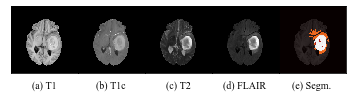

In [131]:
fig, axs = plt.subplots(1, 5, frameon=False)

# Remove horizontal space between axes
fig.subplots_adjust(wspace=0)

subimage(axs[0], patient_t1[:,:,slice_nr], '(a) T1', alpha=1.0)

subimage(axs[1], patient_t1c[:,:,slice_nr], '(b) T1c', alpha=1.0)

subimage(axs[2], patient_t2[:,:,slice_nr], '(c) T2', alpha=1.0)

subimage(axs[3], patient_flair[:,:,slice_nr], '(d) FLAIR', alpha=1.0)

subimage(axs[4], patient_t1[:,:,slice_nr], 'T1', alpha=1.0)
subimage(axs[4], patient_seg[:,:,slice_nr], '(e) Segm.', alpha=0.8)

# plt.tight_layout()
plt.savefig('figures/example_seg.pdf', dpi=400, bbox_inches='tight', pad_inches=0)
plt.show()